In [1]:
import warnings
warnings.filterwarnings('ignore')

### Reading and Understanding the Data

In [2]:
import pandas as pd
import numpy as np

In [3]:
startups = pd.read_csv("Startup.csv")
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
startups.shape

(50, 5)

In [5]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
# Statistical summary
startups.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
# Null-value percentage
(startups.isnull().sum()/startups.shape[0]) *100

R&D Spend          0.0
Administration     0.0
Marketing Spend    0.0
State              0.0
Profit             0.0
dtype: float64

### Check for Outliers

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='R&D Spend'>

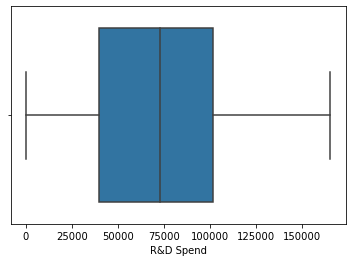

In [9]:
sns.boxplot(startups["R&D Spend"])

<AxesSubplot:xlabel='Administration'>

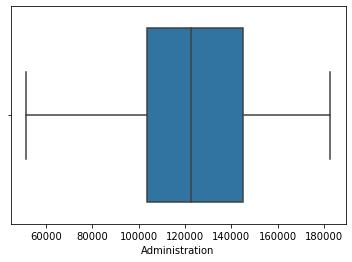

In [10]:
sns.boxplot(startups["Administration"])

<AxesSubplot:xlabel='Marketing Spend'>

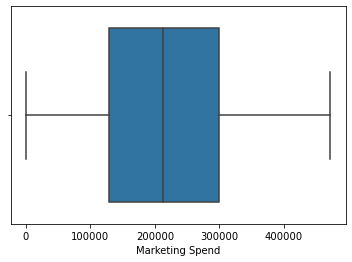

In [11]:
sns.boxplot(startups["Marketing Spend"])

<AxesSubplot:xlabel='Profit'>

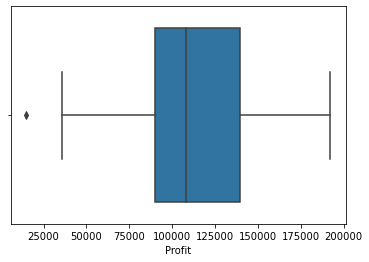

In [12]:
sns.boxplot(startups["Profit"])

Inference: There are no outliers for predictor variable.

In [13]:
'''Remove outliers are target variable'''
Q3, Q1 = np.percentile(startups["Profit"], [75 ,25])
IQR = Q3 - Q1
IQR

49627.07499999998

In [14]:
# Remove outlier
startups = startups[~(startups.Profit< (Q1 - 1.5*IQR))]

<AxesSubplot:xlabel='Profit'>

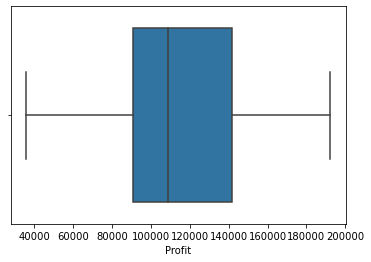

In [15]:
sns.boxplot(startups["Profit"])

In [16]:
# Recheck the dimention of the dataframe
startups.shape

(49, 5)

In [17]:
# Statistical summary for modified dataframe
startups.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,49.000000,49.000000,49.000000,49.000000
mean,75226.138367,121433.636327,214409.833265,113998.991020
std,45115.141560,28301.008988,121168.170072,38171.246893
min,0.000000,51283.140000,0.000000,35673.410000
25%,44069.950000,103057.490000,134050.070000,90708.190000
50%,73994.560000,122782.750000,214634.810000,108552.040000
75%,101913.080000,145077.580000,299737.290000,141585.520000
max,165349.200000,182645.560000,471784.100000,192261.830000


#### Visualising Numeric Variables

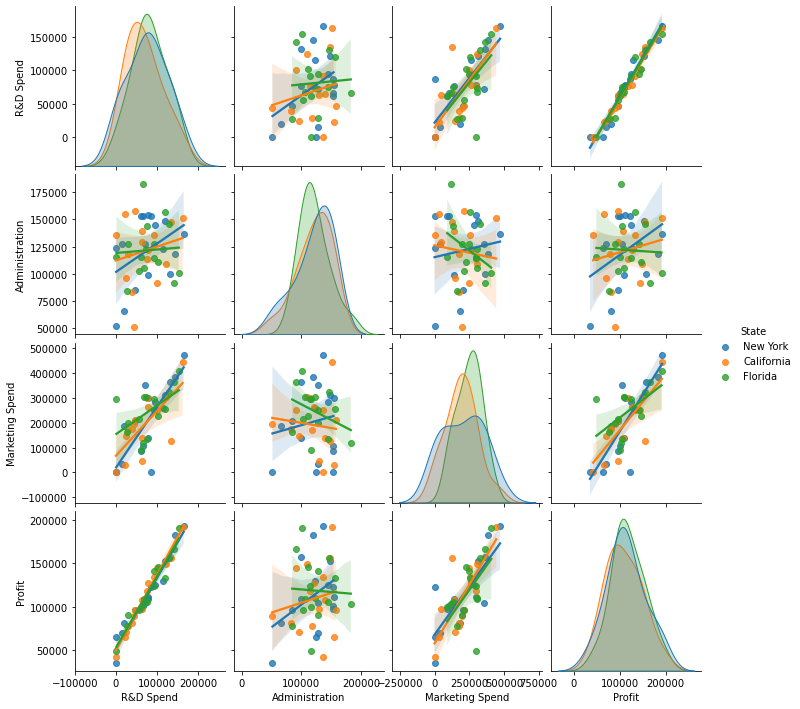

In [18]:
# Numerical columns
sns.pairplot(startups, kind="reg", diag_kind="kde",  hue="State")
plt.show()

<b>Inference:</b> 
    The features- "R&D Spend" and "Marketing Spend" are in linear relation with target variable.

#### Visualising Categorical Variables

In [19]:
California = startups[startups.State == "California"]
Florida    = startups[startups.State == "Florida"]
New_York   = startups[startups.State == "New York"]

Average profit in California(in million$) = $0.109
Average profit in Florida   (in million$) = $0.119
Average profit in New_York  (in million$) = $0.114


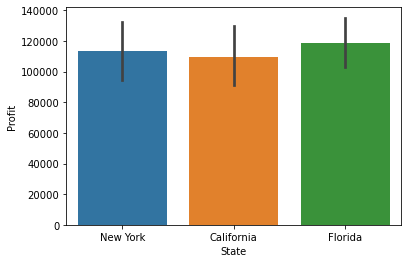

In [20]:
Profit_California = round(California.Profit.mean(), 2)
Profit_Florida    = round(Florida.Profit.mean(), 2)
Profit_New_York   = round(New_York.Profit.mean(), 2)

ax = sns.barplot(x="State", y="Profit", data=startups)

print(f"Average profit in California(in million$) = ${round(Profit_California/1000000,3)}")
print(f"Average profit in Florida   (in million$) = ${round(Profit_Florida/1000000, 3)}")
print(f"Average profit in New_York  (in million$) = ${round(Profit_New_York/1000000, 3)}")

<b>Inference:</b> On an average return profits are maximum at Florida than other states.

Average company's administration in California(in million$) = $0.121
Average company's administration in Florida   (in million$) = $0.122
Average company's administration in New_York  (in million$) = $0.122


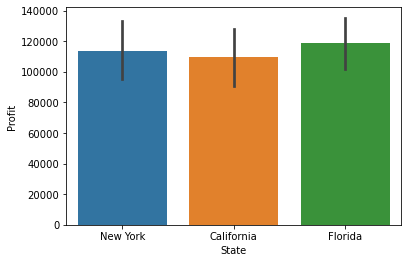

In [21]:
Administration_California = round(California.Administration.mean(), 2)
Administration_Florida    = round(Florida.Administration.mean(), 2)
Administration_New_York   = round(New_York.Administration.mean(), 2)

ax = sns.barplot(x="State", y="Profit", data=startups)

print(f"Average company's administration in California(in million$) = ${round(Administration_California/1000000, 3)}")
print(f"Average company's administration in Florida   (in million$) = ${round(Administration_Florida/1000000, 3)}")
print(f"Average company's administration in New_York  (in million$) = ${round(Administration_New_York/1000000, 3)}")

<b>Inference:</b> On an average company's administration is same for all states.

Average marketing in California(in million$) = $0.191
Average marketing in Florida   (in million$) = $0.247
Average marketing in New_York  (in million$) = $0.205


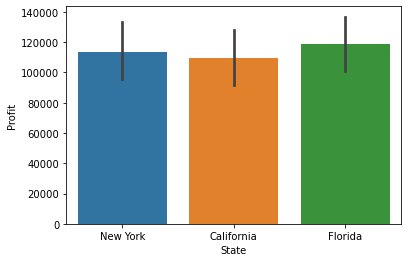

In [22]:
Marketing_California = round(California["Marketing Spend"].mean(), 2)
Marketing_Florida    = round(Florida["Marketing Spend"].mean(), 2)
Marketing_New_York   = round(New_York["Marketing Spend"].mean(), 2)

ax = sns.barplot(x="State", y="Profit", data=startups)

print(f"Average marketing in California(in million$) = ${round(Marketing_California/1000000, 3)}")
print(f"Average marketing in Florida   (in million$) = ${round(Marketing_Florida/1000000, 3)}")
print(f"Average marketing in New_York  (in million$) = ${round(Marketing_New_York/1000000, 3)}")

<b>Inference:</b> On an average marketing expense are minimum at California than other states.

### Data Preparation

In [23]:
startups["State"].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [24]:
startups = pd.get_dummies(startups, drop_first=True)
startups.rename(columns={"R&D Spend":"R&D", "Marketing Spend":"Marketing", 
                         "State_Florida":"Florida", "State_New York":"New York"}, inplace=True)

In [25]:
startups.head()

,R&D,Administration,Marketing,Profit,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


### Visualise the entire dataset

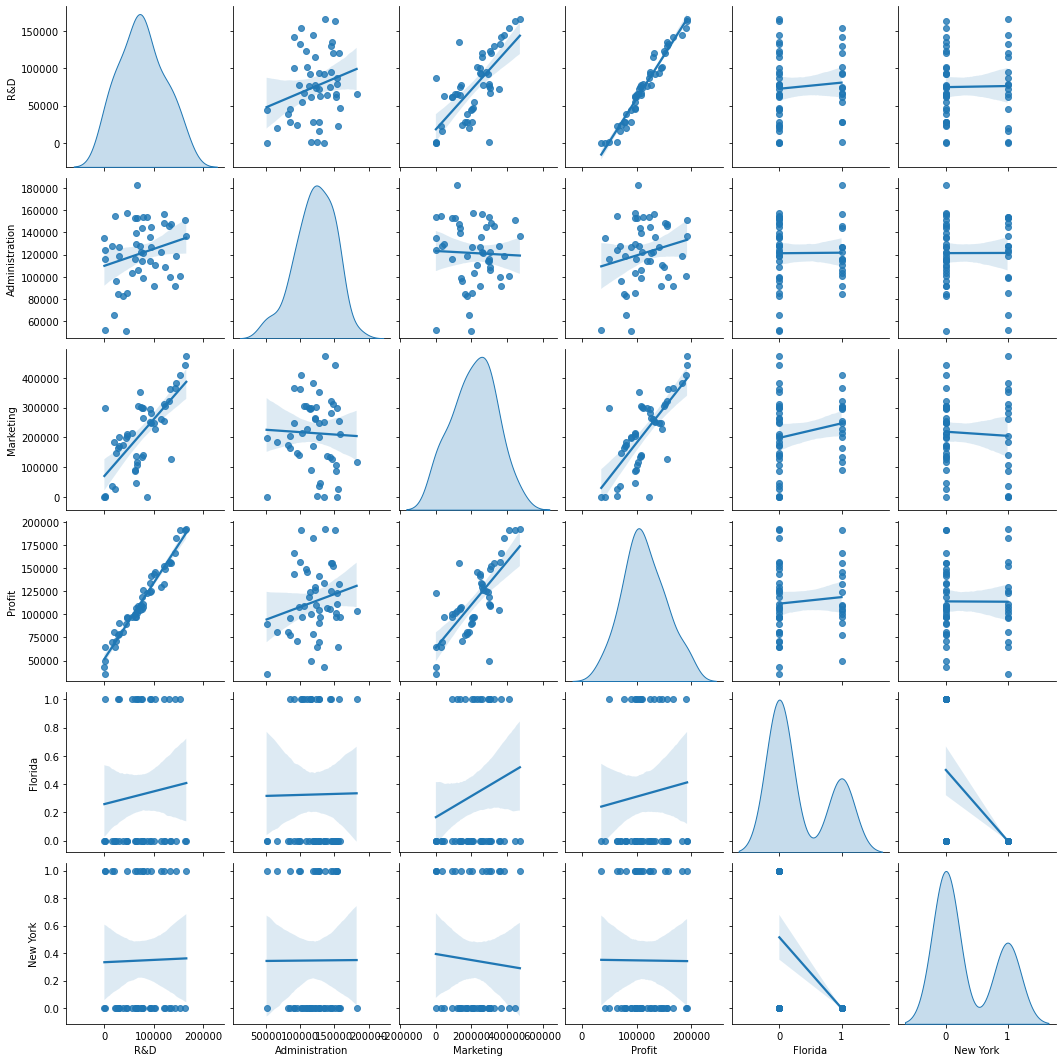

In [26]:
sns.pairplot(startups, kind="reg", diag_kind="kde")
plt.show()

In [27]:
startups.corr()

,R&D,Administration,Marketing,Profit,Florida,New York
R&D,1.000000,0.243438,0.711654,0.978437,0.085734,0.015816
Administration,0.243438,1.000000,-0.037280,0.205841,0.008334,0.002858
Marketing,0.711654,-0.037280,1.000000,0.739307,0.191104,-0.055087
Profit,0.978437,0.205841,0.739307,1.000000,0.088008,-0.004679
Florida,0.085734,0.008334,0.191104,0.088008,1.000000,-0.507519
New York,0.015816,0.002858,-0.055087,-0.004679,-0.507519,1.000000


<b>Inference:</b> 

     1. At "New York" profit returns are worse and startup, might end up in loss and its marketing expenditure is 
        high than other states.
     2. Company profit is higly dependent on the R&D expense as R&D expense is highly correlated with Profit.
     3. Profits from the states doesn't make a significant change to the company.
     4. Company spends more on R&D, quality of marketing for the comapany increases. Hence, increase in overall profit.

### Splitting the Data into Training and Testing Sets

In [28]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
startups_train, startups_test = train_test_split(startups, train_size=0.67, test_size=0.33, random_state=5)

In [29]:
startups_train.shape

(32, 6)

In [30]:
startups_test.shape

(17, 6)

### Rescaling the Features

In [31]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()

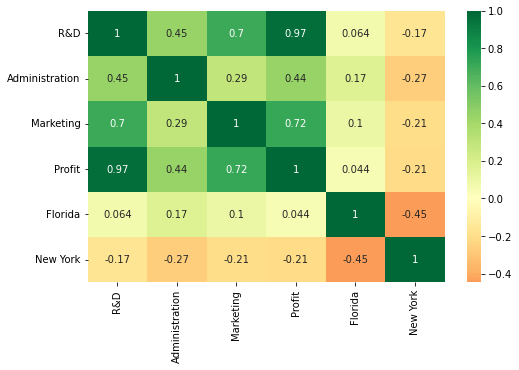

In [32]:
'''There is no multi-collinearity between the predictor variables'''
plt.figure(figsize=[8,5])
sns.heatmap(startups_train.corr(), annot = True, cmap="RdYlGn", center=0.0)
plt.show()

In [33]:
# standard the numerical columns
num_col = ["R&D","Administration","Marketing","Profit"]
# num_col = startups_train.iloc[:,-3:]

startups_train[num_col] = scaler.fit_transform(startups_train[num_col])
startups_train.reset_index(drop=True, inplace=True)
startups_train.head()

,R&D,Administration,Marketing,Profit,Florida,New York
0,-0.542139,1.471558,-0.067307,-0.367193,0,0
1,-0.600008,-2.307971,-0.208057,-0.568692,0,0
2,0.167748,0.990003,-0.851886,-0.098453,1,0
3,-0.997334,-1.120678,-0.540901,-0.930667,1,0
4,-0.319421,-0.469034,-0.028080,-0.365223,1,0


### Dividing into X and Y sets for the model building

In [34]:
y_train = startups_train.pop("Profit")
X_train = startups_train

### Building a linear model

In [35]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [36]:
# VIF values of the feature variables:
def VIF(X):
    vif = pd.DataFrame()
    vif["Features"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X.shape[1])]
    vif["VIF"] = round(vif["VIF"], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [37]:
X_train_1 = X_train[["R&D"]]
X_train_lm = sm.add_constant(X_train_1)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
print(lr_1.summary())

VIF(X_train_1)

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     444.2
Date:                Sun, 26 Sep 2021   Prob (F-statistic):           1.55e-19
Time:                        14:31:28   Log-Likelihood:                -1.2402
No. Observations:                  32   AIC:                             6.480
Df Residuals:                      30   BIC:                             9.412
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const               0      0.046          0      1.0

,Features,VIF
0,R&D,2.27


In [38]:
X_train_2 = X_train[["R&D","Marketing"]]
X_train_lm2 = sm.add_constant(X_train_2)
lr_2 = sm.OLS(y_train, X_train_lm2).fit()
print(lr_2.summary())

VIF(X_train_2)

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     227.2
Date:                Sun, 26 Sep 2021   Prob (F-statistic):           1.91e-18
Time:                        14:31:28   Log-Likelihood:               -0.38873
No. Observations:                  32   AIC:                             6.777
Df Residuals:                      29   BIC:                             11.17
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const               0      0.045          0      1.0

,Features,VIF
0,R&D,2.27
1,Marketing,1.32


<b>Inference:</b>
<!--  -->
    1. The p-value is significant for co-efficients of predictor variable and constant of the regression line. So 
    the association is not purely by chance.
    2. Prob (F-statistic) tells the model fit is statistically significant, and the explained variance isn't purely 
    by  chance.

### Dropping the Variable and Updating the Model
<!--  -->
     As some of the variable have high p-values. Such variables are insignificant and should be dropped.
     Hence, the model is stable for R&D, Marketing.

### Residual analysis 

In [39]:
Predicted_profit  = lr_2.predict(X_train_lm2)
residuals = y_train - Predicted_profit

Act_pred = pd.DataFrame(data={"Predicted":Predicted_profit, "Actual":y_train, "Residual Error":round(residuals,3)})
Act_pred.reset_index(drop=True, inplace=True)
Act_pred.head()

,Predicted,Actual,Residual Error
0,-0.499476,-0.367193,0.132
1,-0.563538,-0.568692,-0.005
2,0.084324,-0.098453,-0.183
3,-0.952411,-0.930667,0.022
4,-0.293353,-0.365223,-0.072


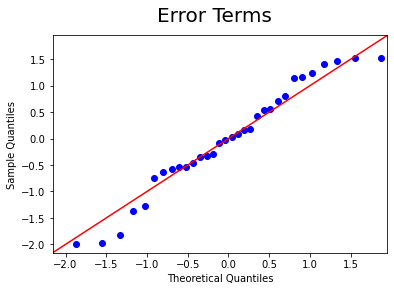

In [40]:
# Q-Q plot
'''The Q-Q plot infers that the residuals meets condition of homoscedasticity'''
import scipy.stats as stats

fig = sm.qqplot(residuals, stats.t, fit=True, line="45")
fig.suptitle("Error Terms", fontsize = 20)    
plt.show()

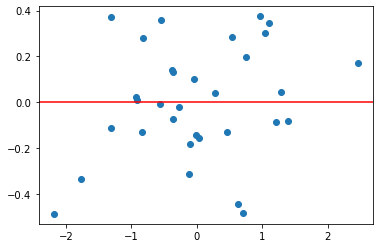

In [41]:
'''The errors should not follow any pattern and equally distributed y=0(i.e; mean=0.000)'''
plt.scatter(y_train, residuals)
plt.axhline(y=0.0, color='r', linestyle='-')
plt.show()

### Making Predictions Using the Final Model

In [42]:
startups_test[num_col] = scaler.transform(startups_test[num_col])
startups_test.head()

,R&D,Administration,Marketing,Profit,Florida,New York
42,-1.101768,-0.712969,-0.709267,-1.118363,0,0
29,-0.071070,1.305977,-1.127001,-0.239333,0,1
6,1.623896,1.098792,-0.916630,1.402705,0,0
19,0.440152,1.323099,-2.222261,0.409292,0,1
28,-0.060115,2.357798,-1.014449,-0.171476,1,0


In [43]:
startups_test.describe()

,R&D,Administration,Marketing,Profit,Florida,New York
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,0.476236,0.529358,-0.087566,0.425973,0.235294,0.529412
std,1.235376,0.914802,1.611739,1.324233,0.437237,0.514496
min,-1.682417,-0.883381,-2.222261,-1.980489,0.000000,0.000000
25%,-0.125021,-0.373364,-1.320419,-0.344231,0.000000,0.000000
50%,0.242920,0.680672,-0.709267,0.067768,0.000000,1.000000
75%,1.623896,1.294251,1.487219,1.428582,0.000000,1.000000
max,2.378752,2.357798,2.600721,2.479346,1.000000,1.000000


### Dividing into X_test and y_test

In [44]:
y_test = startups_test.pop("Profit")
X_test = startups_test

In [45]:
X_test_lm2 = sm.add_constant(X_test)
X_test_lm2 = X_test_lm2.drop(["Administration","Florida","New York"], axis = 1).reset_index(drop=True)
X_test_lm2.head()

,const,R&D,Marketing
0,1.0,-1.101768,-0.709267
1,1.0,-0.071070,-1.127001
2,1.0,1.623896,-0.916630
3,1.0,0.440152,-2.222261
4,1.0,-0.060115,-1.014449


In [46]:
# Making predictions using the second model
Predicted_Profit = lr_2.predict(X_test_lm2)

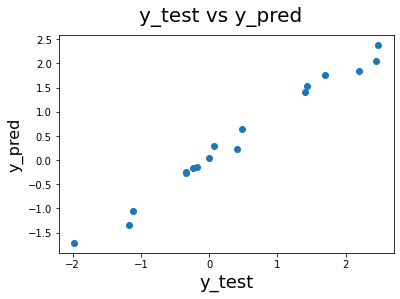

In [47]:
fig = plt.figure()
plt.scatter(y_test, Predicted_Profit)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)   
plt.show()

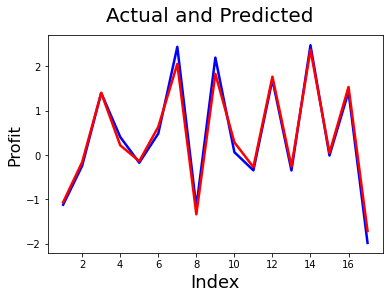

In [48]:
#Actual vs Predicted - Test dataset.
c = [i for i in range(1,18,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,Predicted_Profit, color="red", linewidth=2.5, linestyle="-")
fig.suptitle("Actual and Predicted", fontsize=20)              # Plot heading 
plt.xlabel("Index", fontsize=18)                               # X-label
plt.ylabel("Profit", fontsize=16)                               # Y-label
plt.show()

###  Model Evaluation

In [49]:
# Evaluvate using r-squared metrics
from sklearn.metrics import r2_score

r2 = r2_score(y_test,Predicted_Profit)
round(r2, 4)

0.9806

In [50]:
# Check the mean error for predicted value and actual value
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, Predicted_Profit)
print(f"Mean Squared Error = {round(mse, 4)}")

Mean Squared Error = 0.032


In [51]:
# Adjusted R-squared

'''n is number of rows in X_test'''
n = X_test_lm2.shape[0]

'''Number of features'''
p = X_test_lm2.shape[1]

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
round(adjusted_r2, 4)

0.9761

In [52]:
mse_percent = round(mse, 4)
r2_percent = round(r2*100, 2)
adjusted_r2_percent = round(adjusted_r2*100, 2)
result = pd.DataFrame(data={"MSE%":[mse_percent], "R-squared%":[r2_percent], 
                            "Adjusted R-squared%":[adjusted_r2_percent]})
result

,MSE%,R-squared%,Adjusted R-squared%
0,0.032,98.06,97.61


## Equation of model

In [53]:
# Parameters from regression model
parameter = lr_2.params

const  = round(parameter[0], 2)
coeff1 = round(parameter[1], 2)
coeff2 = round(parameter[2], 2)
eqn = pd.DataFrame(data={"coeff Constant":[const], "coeff R&D":[coeff1], "coeff Marketing":[coeff2]})
eqn

,coeff Constant,coeff R&D,coeff Marketing
0,0.0,0.91,0.08


### Gradient descent

In [54]:
# Convert X and y to arrays
import numpy as np
X = X_train_lm2
y = y_train

X = np.array(X)
y = np.array(y)

In [55]:
# Theta is the vector representing coefficients (intercept, area, bedrooms)
theta = np.matrix(np.array([0,0,0])) 
alpha = 0.5
iterations = 1000

In [56]:
def compute_cost(X, y, theta):
    return np.sum(np.square(np.matmul(X, theta) - y)) / (2 * len(y))

In [57]:
# gradient descent
'''Takes in current X, y, learning rate alpha, num_iters
    returns cost (notice it uses the cost function defined above)'''

def gradient_descent_multi(X, y, theta, alpha, iterations):
    theta = np.zeros(X.shape[1])
    m = len(X)
    gdm_df = pd.DataFrame( columns = ['Bets','cost'])

    for i in range(iterations):
        gradient = (1/m) * np.matmul(X.T, np.matmul(X, theta) - y)
        theta = theta - alpha * gradient
        cost = compute_cost(X, y, theta)
        gdm_df.loc[i] = [theta,cost]

    return gdm_df

In [58]:
# print costs with various values of coefficients b0, b1, b2
gradient_descent_multi(X, y, theta, alpha, iterations)

,Bets,cost
0,"[3.469446951953614e-18, 0.48392443864394097, 0...",0.076453
1,"[7.979727989493313e-17, 0.5992983211483056, 0....",0.057157
2,"[1.2663481374630692e-16, 0.6534067523489729, 0...",0.049535
3,"[1.3704315460216776e-16, 0.6929087028352195, 0...",0.044152
4,"[1.5005358067199381e-16, 0.725560456902097, 0....",0.040254
...,...,...
995,"[1.1796119636642288e-16, 0.9113169027080569, 0...",0.029995
996,"[1.0408340855860843e-16, 0.9113169027080569, 0...",0.029995
997,"[1.214306433183765e-16, 0.9113169027080569, 0....",0.029995
998,"[1.0755285551056204e-16, 0.9113169027080569, 0...",0.029995


In [59]:
Coeff = gradient_descent_multi(X, y, theta, alpha, iterations).iloc[999,:]

In [60]:
const  = round(Coeff[0][0], 2)
coeff1 = round(Coeff[0][1], 2)
coeff2 = round(Coeff[0][2], 2)
eqn_gradient = pd.DataFrame(data={"coeff Constant":[const], "coeff R&D":[coeff1], "coeff Marketing":[coeff2]})
eqn_gradient

,coeff Constant,coeff R&D,coeff Marketing
0,0.0,0.91,0.08


<b>Inference:</b> As the model coefficients obtained are same in both cases.

$ Profit =  0.1 + 0.78  \times  RD + 0.08  \times  Marketing $